## Network Analysis Using Networkx

Networkx is a popular python package for analyzing network and graphs.

Why are networks important to study?

- In social media, once can find social social media influencers.
- In case of transport network one will be able to find the most optimal way to travel between two stations
- Find clusters in network

- What does a network made of?
    - Nodes and edges!
    
<img src="images/NodesAndEdges.png" width="400" height="400">

- Nodes and Edges can have additional data also knows as attributes

<img src="images/node_edge_attrs.png" width="400" height="400">

Let us build some basic network using networkx package:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()

Let's us add a few nodes:

In [3]:
G.add_nodes_from([1, 2, 3, 4, 5])

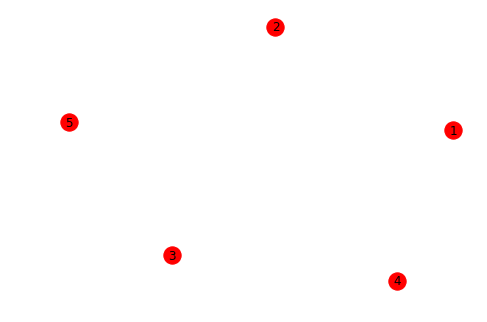

In [4]:
nx.draw(G, with_labels=True)

Let's now add some edges

In [5]:
G.add_edges_from([(1, 3), (2, 3), (2, 4), (3, 5)])

We can now visualize this network/graph

In [6]:
G.add_edge(3, 4)

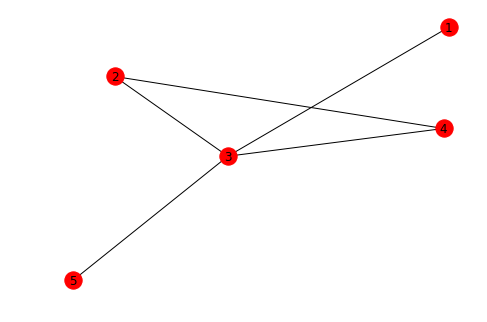

In [7]:
nx.draw(G, with_labels=True)

In [8]:
for x in list(nx.find_cliques(G)):
    print(x)

[3, 1]
[3, 2, 4]
[3, 5]


We can also now add some attributes to these nodes:

Attributes can be added in various manners

In [9]:
G.nodes[1]["label"] = "blue"

In [10]:
G.node.data()

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}, 4: {}, 5: {}})

We can create a dictionary of attributes as well and assign it :

In [11]:
attrs_1 = {2: {"label":"red"}, 3: {"label": "green"} }

In [12]:
nx.set_node_attributes(G, attrs_1)

In [13]:
G.node.data()

NodeDataView({1: {'label': 'blue'}, 2: {'label': 'red'}, 3: {'label': 'green'}, 4: {}, 5: {}})

Attributes similarly can be added to edges as well:

In [14]:
attrs_edges = {(1, 3): {"joined_on": "21-JAN-20"}, (2, 3): {"joined_on": "22-JAN-20"}}

In [15]:
nx.set_edge_attributes(G, attrs_edges)

In [16]:
G.edges.data()

EdgeDataView([(1, 3, {'joined_on': '21-JAN-20'}), (2, 3, {'joined_on': '22-JAN-20'}), (2, 4, {}), (3, 5, {}), (3, 4, {})])

In [17]:
G.add_weighted_edges_from([(3, 6, 2), (3, 5, 10)])

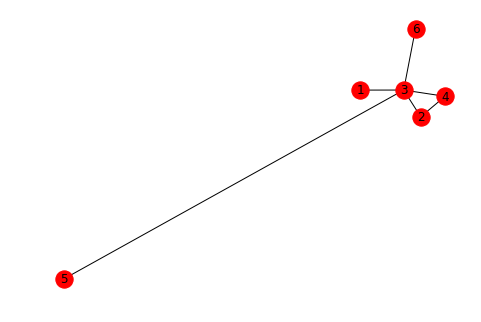

In [18]:
nx.draw_kamada_kawai(G, with_labels=True)

In [19]:
G1 = nx.Graph()

In [20]:
G1.add_weighted_edges_from([(1, 2, 1), (1, 3, 1.5), (1, 4, 2), (1, 5, 2.5), (1, 6, 3), (6, 7, 0.5)])

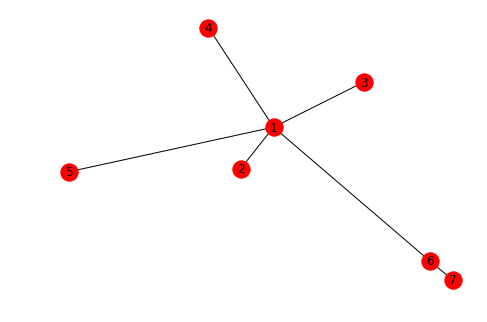

In [21]:
nx.draw_kamada_kawai(G1, with_labels=True)

In [22]:
G1.edges.data()

EdgeDataView([(1, 2, {'weight': 1}), (1, 3, {'weight': 1.5}), (1, 4, {'weight': 2}), (1, 5, {'weight': 2.5}), (1, 6, {'weight': 3}), (6, 7, {'weight': 0.5})])

### Betweenness centrality

#### All shortest path

- Set of paths
- Each path is shortest path between a given pair of nodes
- Done for all pair of nodes

\begin{equation}
\text{Betweenness Centrality} = \frac{\text{No. of shortest paths through the node}}{\text{all possible shortest paths}}
\end{equation}

### Degree Centrality

- Definition

\begin{equation}
\text{Degree Centrality} = \frac{\text{No. of Neighbors}}{\text{No. of Possible Neighbors}}
\end{equation}

In [23]:
nx.betweenness_centrality(G1)

{1: 0.9333333333333333,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.3333333333333333,
 7: 0.0}

In [24]:
nx.degree_centrality(G1)

{1: 0.8333333333333333,
 2: 0.16666666666666666,
 3: 0.16666666666666666,
 4: 0.16666666666666666,
 5: 0.16666666666666666,
 6: 0.3333333333333333,
 7: 0.16666666666666666}

### Cliques

- Social Cliques: tightly knit group
- Network cliques: completely connected graphs

What would be the simplest clique?
<img src="images/simplest_clique.png" width="100" height="100">

In case of three nodes a clique would like this:
<img src="images/triangle.png" width="200" height="200">

As the number of nodes increased, a clique can get complicated:

<img src="images/maximal_clique.png" width="200" height="200">

What would be the advantage of a triangle clique?
    
- Recommending friends in a social network.

### Maximal Cliques:

- Definition: a clique that, when extended by one node is no longer a clique
- Fully connected cliques are fully connected subgraphs and are useful for finding closely knitted communities.

### Subgraphs

- Visualize portions of a large graph
- Explore communities/cliques
- Degrees of separation of node

In [71]:
G = nx.erdos_renyi_graph(n=40, p=0.5)

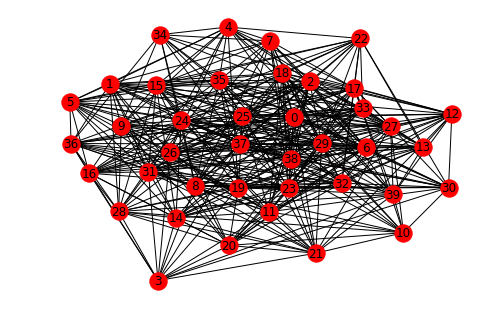

In [72]:
nx.draw(G, with_labels=True)

Let's say we want to plot only node number "8" and its neighbors

In [73]:
nodes = G.neighbors(8)

In [74]:
test = list(nodes)

In [75]:
test.append(8)

In [77]:
G_sub = G.subgraph(test)

In [78]:
G_sub.edges()

EdgeView([(2, 6), (2, 7), (2, 8), (2, 9), (2, 23), (2, 24), (2, 25), (2, 29), (2, 31), (2, 35), (2, 37), (2, 39), (3, 8), (3, 20), (3, 21), (3, 30), (3, 31), (3, 36), (3, 37), (3, 39), (5, 6), (5, 8), (5, 9), (5, 24), (5, 31), (5, 32), (5, 35), (5, 36), (6, 7), (6, 8), (6, 9), (6, 18), (6, 20), (6, 23), (6, 25), (6, 29), (6, 30), (6, 31), (6, 32), (6, 35), (6, 37), (7, 8), (7, 23), (7, 29), (7, 32), (7, 34), (7, 35), (7, 37), (8, 9), (8, 10), (8, 18), (8, 20), (8, 21), (8, 23), (8, 24), (8, 25), (8, 29), (8, 30), (8, 31), (8, 32), (8, 34), (8, 35), (8, 36), (8, 37), (8, 39), (9, 18), (9, 20), (9, 23), (9, 24), (9, 29), (9, 30), (9, 31), (9, 34), (10, 20), (10, 21), (10, 29), (10, 30), (10, 34), (10, 37), (10, 39), (18, 23), (18, 25), (18, 29), (18, 32), (18, 37), (18, 39), (20, 21), (20, 29), (20, 32), (21, 23), (21, 24), (21, 25), (21, 29), (21, 31), (21, 39), (23, 25), (23, 29), (23, 30), (23, 31), (23, 35), (23, 36), (23, 37), (24, 25), (24, 29), (24, 32), (24, 34), (24, 37), (24, 3

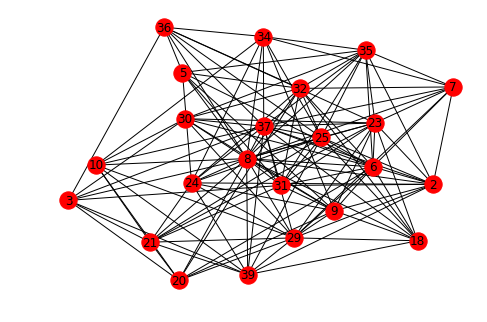

In [79]:
nx.draw(G_sub, with_labels=True)

In [92]:
import nxviz as nv

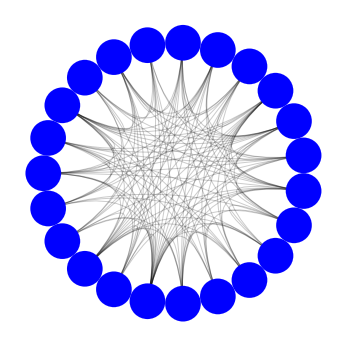

In [93]:
c = nv.CircosPlot(G_sub)
c.draw()